In [406]:
# install requred modules
!pip install matplotlib
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
import matplotlib.pyplot as plt

plt.style.use(['dark_background'])

In [407]:
# check if we have input data
!head EURUSD.csv

20190201 000000;1.144200;1.144280;1.144180;1.144180;0
20190201 000100;1.144180;1.144250;1.144140;1.144140;0
20190201 000200;1.144140;1.144150;1.144090;1.144100;0
20190201 000300;1.144100;1.144110;1.144090;1.144110;0
20190201 000400;1.144110;1.144140;1.144090;1.144100;0
20190201 000500;1.144100;1.144100;1.144030;1.144070;0
20190201 000600;1.144070;1.144070;1.143980;1.143990;0
20190201 000700;1.143990;1.144070;1.143970;1.144020;0
20190201 000800;1.144030;1.144060;1.144030;1.144050;0
20190201 000900;1.144060;1.144060;1.144010;1.144030;0


In [408]:
# read in the input data into a data frame

# Label       Description
# ---------   ---------------- 
# DATE        DateTime
# TIMESTAMP   Stamp
# OPEN        Bar OPEN Bid Quote
# HIGH        Bar HIGH Bid Quote
# LOW         Bar LOW Bid Quote
# CLOSE       Bar CLOSE Bid Quote
# VOLUME      Volume

df = pd.read_csv("EURUSD.csv", engine='python', sep=' |;',     
                 names=["DATE", "TIMESTAMP", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"]).head(1000)

df.head(4)


,DATE,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME
0,20190201,0,1,1,1,1,0
1,20190201,100,1,1,1,1,0
2,20190201,200,1,1,1,1,0
3,20190201,300,1,1,1,1,0


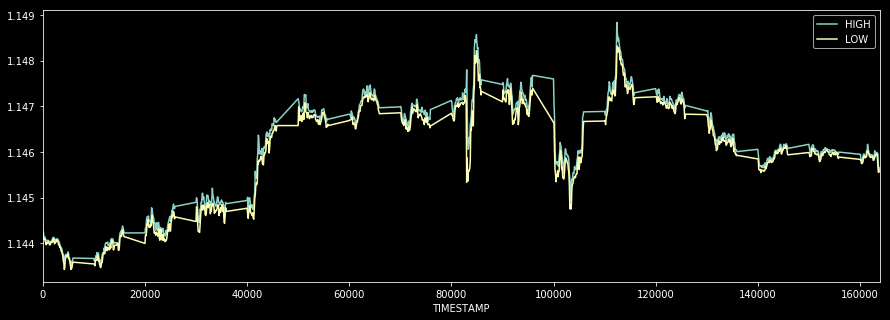

In [409]:
df.plot(x='TIMESTAMP', y=['HIGH', 'LOW'], figsize=(15,5))

In [410]:
# Normalize close value, so that we use it to train the model

#df['C'] = df.CLOSE - df.CLOSE.shift(1)
#df['O'] = df.OPEN - df.OPEN.shift(1)

df['CO'] = df.CLOSE
df['OO'] = df.OPEN
df['HO'] = df.HIGH
df['LO'] = df.LOW

df['CI'] = df.CO - df.CO.shift(1)
df['OI'] = df.OO - df.OO.shift(1)
df['HI'] = df.HO - df.HO.shift(1)
df['LI'] = df.LO - df.LO.shift(1)

df.drop(['CLOSE', 'OPEN', 'HIGH', 'LOW', 'DATE', 'TIMESTAMP', 'VOLUME'], axis=1, inplace=True)

for c in ["OO", "CO", "HO", "LO", "OI", "CI", "HI", "LI"]: 
    df[c] = (df[c]  - df[c].min()) / (df[c].max() - df[c].min()) *100

pd.options.display.float_format = '{:,.0f}'.format
    
df.drop(df.index[0], inplace=True)
df.drop(df.index[1], inplace=True)
df.drop(df.index[2], inplace=True)

df.head(10)


,CO,OO,HO,LO,CI,OI,HI,LI
1,13,14,14,15,53,55,49,70
3,13,12,12,13,56,54,49,72
5,12,12,11,12,54,56,49,69
6,10,12,11,11,51,55,49,70
7,11,10,11,11,58,52,51,71
8,11,11,11,12,58,59,51,74
9,11,12,11,12,55,58,51,71
10,11,11,11,12,56,54,52,72
11,11,11,10,12,56,58,50,72
12,11,11,10,12,55,56,50,70


In [402]:
df.head(4)

,CO,OO,HO,LO,CI,OI,HI,LI
1,13,14,14,15,53,55,49,70
3,13,12,12,13,56,54,49,72
5,12,12,11,12,54,56,49,69
6,10,12,11,11,51,55,49,70


In [411]:
#!pip search dataset
#import fastai
#from fastai.models import * #ModelData
#from fastai.vision import *
#model = simple_cnn((3,16,16,2))
from fastai.tabular import *

path = path = os.getcwd()

dep_var = 'OO'

procs = [FillMissing, Normalize]

valid_idx = valid_idx = range(len(df) - 10, len(df)) 

#df.head(10)

data = TabularDataBunch.from_df(path, 
                                df, 
                                dep_var, 
                                valid_idx=valid_idx)

#print(data)


(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))



[0 0 0 0 0]
[[54.766354 63.953487 57.668713 71.95122  57.367386 57.594936 53.57143 ]
 [11.588785 67.441864 10.224949 74.796745 12.573674 62.02532  61.309525]
 [21.682243 52.32558  22.290388 67.88618  21.218075 45.569622 55.357143]
 [ 5.420561 52.90698   6.339468 70.3252    5.304519 48.101265 53.57143 ]
 [15.700934 58.720932 15.746421 76.82927  16.11002  56.329113 59.52381 ]]
[54.72441   9.055119 22.440945  6.102362 15.15748 ]


epoch,train_loss,valid_loss,time
0,3030.293701,2166.317383,00:00
1,3003.598389,2154.603271,00:00
2,2953.895996,2189.387207,00:00
3,2867.687012,2191.843750,00:00
4,2687.063721,1775.572510,00:00
5,2375.658447,1292.721313,00:00
6,1940.989380,617.588013,00:00
7,1448.405640,35.618549,00:00
8,1046.721680,8.411515,00:00
9,763.223328,0.474089,00:00


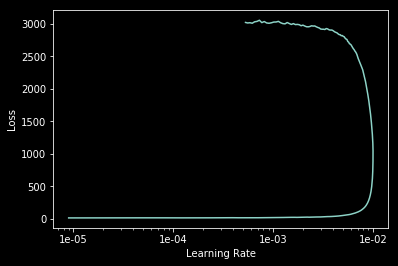

In [412]:
#learn = cnn_learner(data, models.alexnet, metrics=accuracy)
#learn.fit(1)
#print(model)

learn = tabular_learner(data, layers=[100,100])
learn.fit_one_cycle(30, 1e-2)
#learn.lr_find()
learn.recorder.plot()

In [396]:
learn.predict(df.iloc[0])

(FloatItem [15.190501], tensor([15.1905]), tensor([15.1905]))